# **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## **1. Business Problem Understanding**

## Konteks

Apartemen menjadi salah satu solusi kebutuhan tempat tinggal modern, terutama di daerah perkotaan yang lahannya terbatas dan aktivitas bisnisnya padat. Menarik untuk diteliti bagaimana harga apartemen dipengaruhi oleh berbagai faktor internal dan eksternal. Biasanya, individu atau perusahaan bisa menawarkan unit apartemen melalui platform dengan menentukan harga jual sendiri. Namun, penentuan harga secara mandiri ini bisa menyulitkan pemilik untuk menyesuaikan dengan harga pasar. Jika harganya terlalu tinggi, unit bisa sulit terjual. Jika terlalu rendah, keuntungan maksimal pun hilang.

## Rumusan Masalah

Banyak agen properti dan pemilik apartemen yang kesulitan dalam menentukan harga jual yang tepat. Hal ini karena banyak faktor yang perlu dipertimbangkan, seperti lokasi strategis (misalnya dekat stasiun kereta bawah tanah), nilai tanah, rasio luas bangunan, dan lainnya. Akurasi dalam menentukan harga sangat penting agar tetap kompetitif di pasar, tapi tetap memberikan keuntungan optimal bagi pemilik.

## Tujuan

Tujuan dari proyek ini adalah membangun model prediksi menggunakan algoritma Machine Learning untuk memperkirakan harga jual apartemen yang sesuai, berdasarkan karakteristik apartemen seperti luas tanah, jarak ke stasiun, tahun pembangunan, dll.
Model ini diharapkan dapat membantu pemilik properti atau investor dalam membuat keputusan harga, strategi investasi, dan pengembangan properti.

## Pendekatan Analisis

Penelitian ini akan melibatkan berbagai fitur dari sebuah apartemen dan melihat bagaimana hubungannya dengan harga jual apartemen tersebut. Karena target dari penelitian ini adalah harga apartemen yang bersifat numerik kontinu, maka akan digunakan pendekatan analisis regresi. Model ini akan memanfaatkan fitur-fitur apartemen sebagai prediktor untuk memperkirakan harga jual yang sesuai.

## **2.Data Understanding**

| **Attribute** | **Data Type** |
| --- | --- 
| HallwayType | Object 
| TimeToSubway | Object
| SubwayStation | Object
| N_FacilitiesNearBy(ETC) | int
| N_FacilitiesNearBy(PublicOffice) | int
| N_SchoolNearBy(University) | int
| N_Parkinglot(Basement) | int
| YearBuilt | int
| N_FacilitiesInApt | int
| Size(sqf) | int
| SalePrice | int

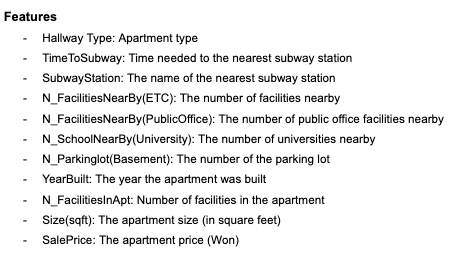

## **3. Data Preprocessing**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/fikrimaulana/Downloads/data_daegu_apartment (1).csv")
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [3]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [4]:
df.duplicated().sum()

1422

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [6]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [7]:
df.describe(include='object')

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [8]:
import numpy as np
import pandas as pd
from scipy import stats

# Fungsi untuk menghitung persentase outliers
def calculate_outlier_percentage(column):
    if column.dtype in [np.float64, np.int64]:
        z_scores = np.abs(stats.zscore(column.dropna()))  # Menghitung skor Z, mengabaikan nilai NaN
        return np.sum(z_scores > 3) / len(column) * 100  # Menghitung persentase outliers
    return 0

# Membuat DataFrame dengan informasi yang diinginkan
df_info = pd.DataFrame({
    'Features'           : df.columns.values,
    'Data Type'         : df.dtypes.values,
    'Null Value (%)'     : df.isna().mean().values * 100,
    'Unique Value'          : df.nunique().values,
    'Duplicate Data'         : df.duplicated().sum(),
    'Negative Value': [len(df[col][df[col] < 0]) / len(df) * 100 
                           if col in df.select_dtypes(include=np.number).columns else 0 
                           for col in df.columns],
    'Outlier(%)'        : [calculate_outlier_percentage(df[col]) for col in df.columns],
    'Unique Sample'     : [df[col].unique() for col in df.columns]
}).round(3)

df_info

,Features,Data Type,Null Value (%),Unique Value,Duplicate Data,Negative Value,Outlier(%),Unique Sample
0,HallwayType,object,0.0,3,1422,0.0,0.000,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,5,1422,0.0,0.000,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,object,0.0,8,1422,0.0,0.000,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0.0,4,1422,0.0,0.000,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,8,1422,0.0,0.000,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,6,1422,0.0,0.000,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,20,1422,0.0,0.000,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,int64,0.0,16,1422,0.0,0.000,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0.0,9,1422,0.0,0.000,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,89,1422,0.0,0.703,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


Tabel ini merupakan ringkasan singkat dari isi setiap kolom dalam dataset:

- Tipe Data: Terdiri dari tipe numerik (int64 & float64) dan kategorikal (object).
- Nilai Kosong (Null): Tidak ada kolom yang memiliki nilai kosong.
- Nilai Unik: Menunjukkan jumlah nilai unik dalam kolom tertentu.
- Data Duplikat: Terdapat 1.422 baris yang merupakan duplikat. Ini akan kita tinjau lebih lanjut agar hasil akhir tidak bias.
- Nilai Negatif: Tidak ditemukan nilai negatif.
- Outlier: Terdapat outlier pada kolom ukuran (Size) dan harga jual (SalePrice). Meskipun hanya <1%, tetap akan kita periksa.

Secara umum, dataset ini cukup baik karena tidak banyak masalah data yang serius.

## Data Duplikat

- Fungsi `duplicated()` di pandas akan menganggap baris duplikat jika seluruh kolomnya sama persis.
- Duplikasi dapat merusak kualitas model machine learning karena mengurangi keragaman dan bisa menyebabkan *overfitting*.
- Karena itu, baris data yang terdeteksi duplikat sebaiknya dihapus.

In [9]:
# dulicate data, all column must be unique
df[df.duplicated()].sort_values(by=['SubwayStation', 'SalePrice'])

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
3824,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,72256
4080,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,72654
2768,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,73008
1203,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,73053
1436,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,73053
...,...,...,...,...,...,...,...,...,...,...,...
2598,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,392035
2793,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,393805
3048,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,393805
3562,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,393805


In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

## Data Outlier

- Penting untuk mendeteksi outlier dan menghapusnya sebelum melatih model machine learning.
- Outlier bisa menurunkan akurasi prediksi model.
- Karena jumlah outlier kurang dari 5%, maka data outlier tidak akan digunakan saat pelatihan model.

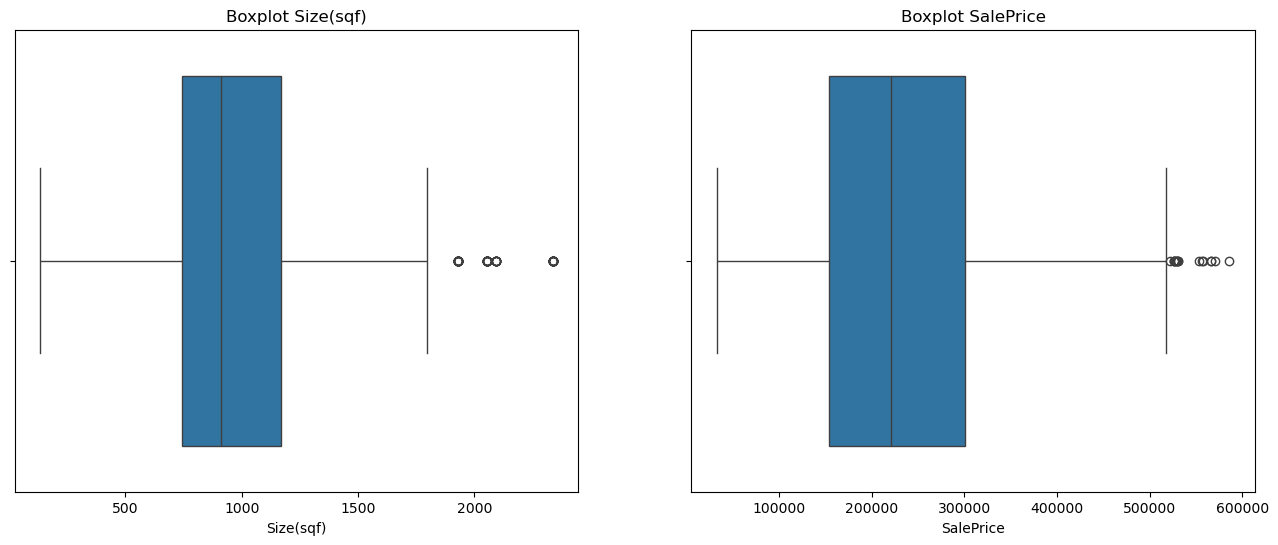

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))

# Create the first subplot for 'Size(sqf)'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
sns.boxplot(x='Size(sqf)', data=df)
plt.title('Boxplot Size(sqf)')

# Create the second subplot for 'SalePrice'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
sns.boxplot(x='SalePrice', data=df)
plt.title('Boxplot SalePrice')

plt.show()

In [13]:
# outliers Size(sqf)
Q1 = df['Size(sqf)'].quantile(0.25)
Q3 = df['Size(sqf)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_size = Q1 - (1.5 * IQR)
upper_bound_size = Q3 + (1.5 * IQR)

outliers_upper_size = df[df['Size(sqf)'] >= upper_bound_size]
outliers_lower_size = df[df['Size(sqf)'] <= lower_bound_size]

print('Lower bound:', lower_bound_size)
print('Upper bound:', upper_bound_size)

print('Number of outliers:', len(outliers_upper_size) + len(outliers_lower_size))

Lower bound: 107.0
Upper bound: 1803.0
Number of outliers: 84


In [14]:
# outliers SalePrice
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_sale = Q1 - (1.5 * IQR)
upper_bound_sale = Q3 + (1.5 * IQR)

outliers_upper_sale = df[df['SalePrice'] >= upper_bound_sale]
outliers_lower_sale = df[df['SalePrice'] <= lower_bound_sale]

print('Lower bound:', lower_bound_sale)
print('Upper bound:', upper_bound_sale)

print('Number of outliers:', len(outliers_upper_sale) + len(outliers_lower_sale))

Lower bound: -67478.5
Upper bound: 521901.5
Number of outliers: 17


In [15]:
# outlier percentage
outlier_size_percentage = (len(outliers_upper_size) + len(outliers_lower_size)) / len(df) * 100
outlier_sale_percentage = (len(outliers_upper_sale) + len(outliers_lower_sale)) / len(df) * 100

print('Outlier percentage Size(sqf):', outlier_size_percentage)
print('Outlier percentage SalePrice:', outlier_sale_percentage)

Outlier percentage Size(sqf): 3.109959274342836
Outlier percentage SalePrice: 0.6293965198074787


In [16]:
# Remove outliers
df_no_outliers = df[(df['Size(sqf)'] >= lower_bound_size) & (df['Size(sqf)'] <= upper_bound_size) &
                    (df['SalePrice'] >= lower_bound_sale) & (df['SalePrice'] <= upper_bound_sale)]

df_no_outliers

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


## Feature Engineering

Kita akan mengelompokkan fitur menjadi beberapa kategori agar proses engineering lebih terstruktur:

- Fitur Numerik: Size(sqf), N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), N_FacilitiesInApt
- Fitur Kategorikal: HallwayType, SubwayStation
- Fitur Ordinal: TimeToSubway

Kolom `YearBuilt` akan dibiarkan apa adanya karena sudah cukup representatif (bernilai diskrit berdasarkan tahun).

In [17]:
df_no_outliers['YearBuilt'].nunique()

16

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import OrdinalEncoder as ce_OrdinalEncoder

In [19]:
df_no_outliers['HallwayType'].unique()

array(['terraced', 'mixed', 'corridor'], dtype=object)

In [20]:
df_no_outliers['SubwayStation'].unique()

array(['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

In [21]:
df_no_outliers['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1190
5min~10min             501
10min~15min            426
15min~20min            394
no_bus_stop_nearby     100
Name: count, dtype: int64

In [22]:
df_no_outliers.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [23]:
# Seperating features by its data types
numeric_features = ['Size(sqf)', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 
                    'N_Parkinglot(Basement)', 'N_FacilitiesInApt']
categorical_features = ['HallwayType', 'SubwayStation']
ordinal_features = ['TimeToSubway']

# Mapping for ordinal encoders (TimeToSubway)
ordinal_map_subway = [{'col':'TimeToSubway',
                'mapping':{'no_bus_stop_nearby':1, 
                           '15min~20min':2, 
                           '10min~15min':3, 
                           '5min~10min':4,
                           '0-5min':5}}]                           

# Preprocessor for encoding dan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord', ce_OrdinalEncoder(mapping=ordinal_map_subway), ordinal_features)
    ],
    remainder='passthrough'
)

# Pipeline for feature engineering
FE_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

FE_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['Size(sqf)',
                                                   'N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType',
                                                   'SubwayStation']),
                                                 ('ord',
                                                  OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no_bus_stop_nearby    1
15min~20min           2
10min~15min           3
5min~10min            4
0-5min                5
dtype: int64}]),
                                                  ['TimeToSubway'])]))])

In [24]:
#make pipeline dataframe
df_transformed = pd.DataFrame(FE_pipeline.fit_transform(df_no_outliers))
df_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.174877,-0.2,-0.5,0.0,1.189627,1.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2007.0,346017.0
1,0.009852,0.0,0.5,-0.5,-0.868720,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1986.0,150442.0
2,-0.866995,0.0,1.5,0.5,-0.777958,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1997.0,61946.0
3,0.009852,0.8,0.5,1.0,0.424635,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2005.0,165486.0
4,2.051724,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,311504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,-0.226601,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,290265.0
2607,2.096059,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,345132.0
2608,0.009852,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0,323008.0
2609,1.332512,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,242477.0


In [25]:
#rename columns after transformation
FE_pipeline.named_steps['preprocessor'].transformers_

[('num',
  RobustScaler(),
  ['Size(sqf)',
   'N_FacilitiesNearBy(ETC)',
   'N_FacilitiesNearBy(PublicOffice)',
   'N_SchoolNearBy(University)',
   'N_Parkinglot(Basement)',
   'N_FacilitiesInApt']),
 ('cat',
  OneHotEncoder(handle_unknown='ignore'),
  ['HallwayType', 'SubwayStation']),
 ('ord',
  OrdinalEncoder(cols=['TimeToSubway'],
                 mapping=[{'col': 'TimeToSubway', 'data_type': dtype('O'),
                           'mapping': no_bus_stop_nearby    1
  15min~20min           2
  10min~15min           3
  5min~10min            4
  0-5min                5
  dtype: int64}]),
  ['TimeToSubway']),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [7, 10])]

In [26]:
# Numeric features
FE_pipeline.named_steps['preprocessor'].transformers_[0][2]

['Size(sqf)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'N_FacilitiesInApt']

In [27]:
# Categorical features
FE_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

array(['HallwayType_corridor', 'HallwayType_mixed',
       'HallwayType_terraced', 'SubwayStation_Bangoge',
       'SubwayStation_Banwoldang', 'SubwayStation_Chil-sung-market',
       'SubwayStation_Daegu', 'SubwayStation_Kyungbuk_uni_hospital',
       'SubwayStation_Myung-duk', 'SubwayStation_Sin-nam',
       'SubwayStation_no_subway_nearby'], dtype=object)

In [28]:
# Ordinal features Subway
FE_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(ordinal_features)

array(['TimeToSubway'], dtype=object)

In [29]:
# Remaining features
remaining_columns = df_no_outliers.drop(numeric_features + categorical_features + ordinal_features, axis=1).columns
remaining_columns

Index(['YearBuilt', 'SalePrice'], dtype='object')

In [30]:
# Combine all features
all_features = list(FE_pipeline.named_steps['preprocessor'].transformers_[0][2]) + \
                list(FE_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + \
                list(FE_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(ordinal_features)) + \
                list(remaining_columns)
                
df_transformed.columns = all_features
df_transformed

,Size(sqf),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,TimeToSubway,YearBuilt,SalePrice
0,1.174877,-0.2,-0.5,0.0,1.189627,1.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2007.0,346017.0
1,0.009852,0.0,0.5,-0.5,-0.868720,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1986.0,150442.0
2,-0.866995,0.0,1.5,0.5,-0.777958,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1997.0,61946.0
3,0.009852,0.8,0.5,1.0,0.424635,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2005.0,165486.0
4,2.051724,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,311504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,-0.226601,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,290265.0
2607,2.096059,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,345132.0
2608,0.009852,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0,323008.0
2609,1.332512,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,242477.0


In [31]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Size(sqf)                            2611 non-null   float64
 1   N_FacilitiesNearBy(ETC)              2611 non-null   float64
 2   N_FacilitiesNearBy(PublicOffice)     2611 non-null   float64
 3   N_SchoolNearBy(University)           2611 non-null   float64
 4   N_Parkinglot(Basement)               2611 non-null   float64
 5   N_FacilitiesInApt                    2611 non-null   float64
 6   HallwayType_corridor                 2611 non-null   float64
 7   HallwayType_mixed                    2611 non-null   float64
 8   HallwayType_terraced                 2611 non-null   float64
 9   SubwayStation_Bangoge                2611 non-null   float64
 10  SubwayStation_Banwoldang             2611 non-null   float64
 11  SubwayStation_Chil-sung-market

Feature Engineering adalah proses membuat atau memodifikasi fitur untuk meningkatkan kinerja model. Teknik yang digunakan:

- RobustScaler: Melakukan scaling data numerik berdasarkan median dan IQR, sangat berguna untuk menangani outlier.
- OneHotEncoder: Mengubah data kategorikal menjadi variabel dummy (0 dan 1).
- OrdinalEncoder: Digunakan untuk fitur ordinal seperti `TimeToSubway` yang memiliki urutan.
- Passthrough: Biarkan kolom seperti `YearBuilt` tetap tanpa diubah karena sudah sesuai.


## Pembagian Data (Split)

Dataset dibagi menjadi dua bagian: training set dan test set. Ini bertujuan agar model bisa dilatih dengan data tertentu dan diuji dengan data berbeda, sehingga menghindari kebocoran informasi dan bisa mengukur performa model secara adil.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df_transformed.drop('SalePrice', axis=1)
y = df_transformed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [34]:
X_train

,Size(sqf),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,TimeToSubway,YearBuilt
2,-0.866995,0.0,1.5,0.5,-0.777958,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1997.0
657,-0.103448,-0.2,-0.5,0.0,1.189627,1.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2007.0
854,0.475369,-0.2,-1.0,0.0,-0.019449,-0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2015,0.588670,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0
862,-0.411330,0.8,0.5,1.0,0.424635,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,0.000000,0.0,-1.0,0.0,-0.570502,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2006.0
1768,-0.199507,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0
1737,0.000000,0.8,1.5,1.5,1.034036,1.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,2014.0
1209,0.009852,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0


In [35]:
y_train

2        61946.0
657     322123.0
854     209911.0
2015    267256.0
862     124778.0
          ...   
1092    176991.0
1768    161504.0
1737    353982.0
1209    315929.0
641     143362.0
Name: SalePrice, Length: 1958, dtype: float64

## **4.Modeling**

Algoritma regresi yang digunakan untuk membandingkan performa model adalah:

- Linear Regression  
- Lasso Regression  
- Ridge Regression  
- Decision Tree 
- KNN
- Random Forest  
- XGBoost

Dari ketujuh model ini, kita akan memilih dua model dengan hasil evaluasi terbaik untuk dilakukan tuning lebih lanjut.

In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

In [37]:
# define function for model evaluation

def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, train_preds)
    mae_test = mean_absolute_error(y_test, test_preds)
    
    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)
    
    mape_train = mean_absolute_percentage_error(y_train, train_preds)
    mape_test = mean_absolute_percentage_error(y_test, test_preds)
    
    rmse_train = mean_squared_error(y_train, train_preds)
    rmse_test = mean_squared_error(y_test, test_preds)
    
    # Save the results and create a dataframe
    data = {
        'Training R^2': r2_train,
        'Test R^2': r2_test,
        'Training MAE': mae_train,
        'Test MAE': mae_test,
        'Training MAPE': mape_train,
        'Test MAPE': mape_test,
        'Training RMSE': rmse_train,
        'Test RMSE': rmse_test
    }
    
    df_results = pd.DataFrame(data, index=[name])
    
    return df_results

In [38]:
linear = evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test, 'Linear Regression')
lasso = evaluate_model(Lasso(random_state=99), X_train, X_test, y_train, y_test, 'Lasso')
ridge = evaluate_model(Ridge(random_state=99), X_train, X_test, y_train, y_test, 'Ridge')
knn = evaluate_model(KNeighborsRegressor(), X_train, X_test, y_train, y_test, 'KNN')
tree = evaluate_model(DecisionTreeRegressor(random_state=99), X_train, X_test, y_train, y_test, 'Decision Tree')
forest = evaluate_model(RandomForestRegressor(random_state=99), X_train, X_test, y_train, y_test, 'Random Forest')
xgb = evaluate_model(XGBRegressor(random_state=99), X_train, X_test, y_train, y_test, 'XGBoost')

In [39]:
df_eval = pd.concat([linear, lasso, ridge, knn, tree, forest, xgb])
df_eval.sort_values(by='Test R^2', ascending=False)

,Training R^2,Test R^2,Training MAE,Test MAE,Training MAPE,Test MAPE,Training RMSE,Test RMSE
XGBoost,0.812751,0.816136,35384.518568,35065.136581,0.182649,0.193196,1.912697e+09,1.880192e+09
Random Forest,0.811973,0.816057,35500.124031,35100.191186,0.184307,0.194029,1.920641e+09,1.880992e+09
Decision Tree,0.812751,0.812067,35384.255846,35164.103715,0.182647,0.194253,1.912697e+09,1.921797e+09
KNN,0.779266,0.796163,37171.891216,36224.458499,0.188940,0.198039,2.254733e+09,2.084431e+09
Ridge,0.756360,0.759163,40916.081923,40669.539049,0.214201,0.225990,2.488712e+09,2.462788e+09
Lasso,0.756411,0.759071,40900.878489,40682.325990,0.214385,0.226122,2.488187e+09,2.463738e+09
Linear Regression,0.756412,0.759052,40900.380308,40684.335617,0.214406,0.226138,2.488184e+09,2.463926e+09


Berdasarkan hasil benchmarking, model `Random Forest` dan `XGBoost` merupakan dua model dengan performa evaluasi terbaik. Selanjutnya, kita akan melakukan hyperparameter tuning pada kedua model ini.

## Random Forest

In [40]:
forest = RandomForestRegressor(random_state=99)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=99)

In [41]:
y_pred_forest = forest.predict(X_test)

r2_forest = r2_score(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mape_forest = mean_absolute_percentage_error(y_test, y_pred_forest)
rmse_forest = mean_squared_error(y_test, y_pred_forest)

df_forest_base = pd.DataFrame({'Random Forest': [r2_forest, mae_forest, mape_forest, rmse_forest]}, index=['R^2', 'MAE', 'MAPE', 'RMSE'])
df_forest_base


,Random Forest
R^2,8.160574e-01
MAE,3.510019e+04
MAPE,1.940294e-01
RMSE,1.880992e+09


## XGBoost

In [42]:
xgb = XGBRegressor(random_state=99)
xgb.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [43]:
y_pred_xgb = xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)

df_xgb_base = pd.DataFrame({'XGBoost': [r2_xgb, mae_xgb, mape_xgb, rmse_xgb]}, index=['R^2', 'MAE', 'MAPE', 'RMSE'])
df_xgb_base

,XGBoost
R^2,8.161356e-01
MAE,3.506514e+04
MAPE,1.931962e-01
RMSE,1.880192e+09


## Hyperparameter Tuning

- Dalam proses ini, digunakan `GridSearchCV` untuk melakukan pencarian kombinasi parameter terbaik. GridSearch akan mencoba **seluruh kombinasi parameter** yang telah ditentukan dan menghitung skor evaluasi dari masing-masing kombinasi.
- Tidak seperti `RandomizedSearchCV` yang hanya mengambil sampel acak dari grid, `GridSearchCV` akan melakukan **pengecekan menyeluruh (brute-force)** terhadap semua kemungkinan.
- Proses ini menggunakan **cross-validation sebanyak 3 kali** (`cv=3`) untuk memastikan hasil yang konsisten, dan `n_jobs=-1` agar memaksimalkan semua core CPU yang tersedia saat melatih model.

## Random Forest Tuning

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],  
    'max_features': ['log2', 'sqrt'],
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_samples': [0.7, 1.0]
}
rf = RandomForestRegressor(random_state=99)
rf_grid= GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,              
    n_jobs=-1,        
    verbose=1,
    scoring='r2')

In [45]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=99), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, None],
                         'max_features': ['log2', 'sqrt'],
                         'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [46]:
results_rf_grid = pd.DataFrame(rf_grid.cv_results_)
results_rf_grid.sort_values(by='rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
108,0.194445,0.002733,0.019775,0.006974,9,log2,1.0,1,2,100,"{'max_depth': 9, 'max_features': 'log2', 'max_...",0.797547,0.807454,0.75621,0.78707,0.022193,1
132,0.156058,0.013302,0.015137,0.000928,9,sqrt,1.0,1,2,100,"{'max_depth': 9, 'max_features': 'sqrt', 'max_...",0.797547,0.807454,0.75621,0.78707,0.022193,1


In [47]:
rf_grid.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [48]:
rf_grid.best_score_

0.7870701672809005

In [49]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=9, max_features='log2', max_samples=1.0,
                      random_state=99)

In [50]:
y_pred_rf_grid = rf_grid.best_estimator_.predict(X_test)

r2_rf_grid = r2_score(y_test, y_pred_rf_grid)
mae_rf_grid = mean_absolute_error(y_test, y_pred_rf_grid)
mape_rf_grid = mean_absolute_percentage_error(y_test, y_pred_rf_grid)
rmse_rf_grid = mean_squared_error(y_test, y_pred_rf_grid)

df_forest_tune = pd.DataFrame({'Random Forest GridSearchCV': [r2_rf_grid, mae_rf_grid, mape_rf_grid, rmse_rf_grid]}, index=['R^2', 'MAE', 'MAPE', 'RMSE'])
df_forest_tune

,Random Forest GridSearchCV
R^2,8.187261e-01
MAE,3.499534e+04
MAPE,1.935904e-01
RMSE,1.853702e+09


## XGBoost Tuning

In [125]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Simpan hasil kombinasi
results = []

# Loop semua kombinasi parameter
for n in param_grid['n_estimators']:
    for lr in param_grid['learning_rate']:
        for md in param_grid['max_depth']:
            for ss in param_grid['subsample']:
                for cs in param_grid['colsample_bytree']:
                    
                    # Inisialisasi dan latih model
                    model = XGBRegressor(
                        n_estimators=n,
                        learning_rate=lr,
                        max_depth=md,
                        subsample=ss,
                        colsample_bytree=cs,
                        objective='reg:squarederror',
                        eval_metric='rmse',
                        use_label_encoder=False,
                        random_state=99
                    )
                    model.fit(X_train, y_train)
                    
                    # Evaluasi model
                    y_pred = model.predict(X_test)
                    r2 = r2_score(y_test, y_pred)

                    # Simpan hasil
                    results.append({
                        'n_estimators': n,
                        'learning_rate': lr,
                        'max_depth': md,
                        'subsample': ss,
                        'colsample_bytree': cs,
                        'r2_score': r2
                    })

# Tampilkan hasil terbaik
df_results = pd.DataFrame(results)
best = df_results.sort_values(by='r2_score', ascending=False).head(1)

print("Best Hyperparameters:")
best

Best Hyperparameters:


,n_estimators,learning_rate,max_depth,subsample,colsample_bytree,r2_score
27,200,0.1,3,1.0,1.0,0.820993


In [121]:
best_params = best.iloc[0]
best_params

n_estimators        200.000000
learning_rate         0.100000
max_depth             3.000000
subsample             1.000000
colsample_bytree      1.000000
r2_score              0.820993
Name: 27, dtype: float64

In [107]:
# Ambil parameter terbaik dari hasil manual tuning
best_params = best.iloc[0]

# Buat model baru dengan parameter terbaik
best_xgb_model = XGBRegressor(
    n_estimators=int(best_params['n_estimators']),
    learning_rate=best_params['learning_rate'],
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    objective='reg:squarederror',
    eval_metric='rmse',
    use_label_encoder=False,
    random_state=99
)

# Fit ulang ke data training
best_xgb_model.fit(X_train, y_train)

# Prediksi & evaluasi
y_pred_xgb_best = best_xgb_model.predict(X_test)

r2_xgb_best = r2_score(y_test, y_pred_xgb_best)
mae_xgb_best = mean_absolute_error(y_test, y_pred_xgb_best)
mape_xgb_best = mean_absolute_percentage_error(y_test, y_pred_xgb_best)
rmse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)

# Tampilkan dalam DataFrame
df_xgb_manual_tune = pd.DataFrame({'XGBoost Manual Tuning': [r2_xgb_best, mae_xgb_best, mape_xgb_best, rmse_xgb_best]},
                                   index=['R^2', 'MAE', 'MAPE', 'RMSE'])

df_xgb_manual_tune

,XGBoost Manual Tuning
R^2,8.209934e-01
MAE,3.488322e+04
MAPE,1.921902e-01
RMSE,1.830516e+09


## Perbandingan Hasil Evaluasi pada Test Set (Sebelum dan Sesudah Tuning)


In [59]:
# Random Forest
df_forest_compare = pd.concat([df_forest_base, df_forest_tune], axis=1)
df_forest_compare

,Random Forest,Random Forest GridSearchCV
R^2,8.160574e-01,8.187261e-01
MAE,3.510019e+04,3.499534e+04
MAPE,1.940294e-01,1.935904e-01
RMSE,1.880992e+09,1.853702e+09


In [109]:
# XGBoost
df_xgb_compare = pd.concat([df_xgb_base, df_xgb_manual_tune], axis=1)
df_xgb_compare

,XGBoost,XGBoost Manual Tuning
R^2,8.161356e-01,8.209934e-01
MAE,3.506514e+04,3.488322e+04
MAPE,1.931962e-01,1.921902e-01
RMSE,1.880192e+09,1.830516e+09


- Setelah melakukan hyperparameter tuning, model yang menggunakan algoritma XGBoost dipilih karena menghasilkan nilai R-Squared yang lebih tinggi (**0.820135**) dibandingkan Random Forest (**0.818726**).
- Bisa dilihat untuk sebelum melakukan Tuning, skor evaluasi XGBoost dibawah Random Forest, tetapi peningkatan signifikan didapatkan sebesar hampir 0.004 untuk XGBoost, sementara Random Forest hanya mendapatkan 0.002
- Namun demikian, baik Random Forest maupun XGBoost sama-sama mengalami peningkatan skor evaluasi pada semua metrik setelah dilakukan tuning.

## Final Model (XGBoost)

## Definisi (Cara Kerja XGBoost)

XGBoost adalah singkatan dari Extreme Gradient Boosting, yaitu algoritma boosting yang sangat cepat dan efisien, dirancang khusus untuk meningkatkan akurasi model prediksi dalam data tabular.

### Apa itu Boosting?
Boosting adalah teknik ensemble yang bekerja dengan cara membangun model secara bertahap. Setiap model baru akan berusaha memperbaiki kesalahan dari model sebelumnya.

### Mekanisme XGBoost:
1. Model pertama dibuat berdasarkan prediksi awal terhadap data.
2. Error dari model pertama dihitung.
3. Model selanjutnya dibuat untuk memperbaiki error tersebut.
4. Proses ini diulang hingga jumlah maksimum model tercapai (n_estimators).
5. Hasil akhir adalah gabungan dari semua model dengan bobot tertentu.

### Kelebihan XGBoost:
- Cepat dan efisien, cocok untuk dataset besar.
- Memiliki regularisasi (`reg_alpha`, `reg_lambda`) untuk menghindari overfitting.
- Mendukung parallel processing dan early stopping.
- Performa tinggi dalam banyak kompetisi data science seperti Kaggle.

Secara sederhana, XGBoost membangun banyak model kecil (tree) secara berurutan untuk memperbaiki prediksi sebelumnya, dan hasil akhirnya jauh lebih akurat serta stabil.


In [61]:
# Min and Max values of Every Feature
min_values = df_no_outliers.min()
max_values = df_no_outliers.max()

min_max_values = pd.concat([min_values, max_values], axis=1)
min_max_values.columns = ['Min', 'Max']
min_max_values

,Min,Max
HallwayType,corridor,terraced
TimeToSubway,0-5min,no_bus_stop_nearby
SubwayStation,Bangoge,no_subway_nearby
N_FacilitiesNearBy(ETC),0.0,5.0
N_FacilitiesNearBy(PublicOffice),0.0,7.0
N_SchoolNearBy(University),0.0,5.0
N_Parkinglot(Basement),0.0,1321.0
YearBuilt,1978,2015
N_FacilitiesInApt,1,10
Size(sqf),135,1796


## Keterbatasan Model

- Model ini hanya akurat dalam rentang nilai fitur yang tersedia dalam data pelatihan. Contoh: ukuran apartemen (Size(sqf)) memiliki nilai minimum 135 dan maksimum 1796. Jika digunakan untuk memprediksi di luar rentang tersebut, hasilnya tidak akan seakurat prediksi dalam rentang data.
- Untuk variabel kategorikal seperti `HallwayType` dan `SubwayStation`, model hanya bisa memprediksi berdasarkan kategori yang sudah dikenal. Jika ada kategori baru, hasil prediksi bisa menjadi tidak akurat.
- Model ini hanya berlaku untuk prediksi harga apartemen di kota Daegu dan tidak bisa digunakan untuk daerah lain.
- Model hanya menggunakan snapshot data saat ini, sehingga tidak cocok untuk prediksi harga di masa depan.
- Model tidak mempertimbangkan faktor eksternal seperti sosial, budaya, atau kebijakan pemerintah yang bisa memengaruhi harga.


## Model Evaluation Metrics

In [110]:
df_xgb_manual_tune

,XGBoost Manual Tuning
R^2,8.209934e-01
MAE,3.488322e+04
MAPE,1.921902e-01
RMSE,1.830516e+09


## Evaluasi Model XGBoost

Berikut adalah metrik evaluasi dari model XGBoost untuk prediksi harga apartemen:

1. R^2 (Koefisien Determinasi): Misalnya sebesar 0.82, artinya sekitar 82% variasi harga apartemen dapat dijelaskan oleh fitur dalam model.
2. MAE (Mean Absolute Error): Rata-rata selisih absolut antara prediksi dan harga asli sekitar ₩35.030.
3. MAPE (Mean Absolute Percentage Error): Rata-rata kesalahan dalam bentuk persentase adalah 19.34%.
4. RMSE (Root Mean Squared Error): Nilai error yang lebih sensitif terhadap outlier. Jika RMSE jauh lebih tinggi dari MAE, berarti model kadang membuat kesalahan besar.

Catatan: Perbedaan kecil antara RMSE dan MAE menunjukkan variasi error yang masih bisa ditoleransi. Model ini bisa dikatakan cukup stabil.


## Feature Importances

In [112]:
best_xgb_model.feature_importances_


array([9.5129972e-03, 1.2542868e-02, 1.7636481e-03, 8.7090844e-04,
       2.0000212e-02, 1.9544650e-02, 3.0920910e-02, 0.0000000e+00,
       8.7520355e-01, 1.3602203e-04, 6.0262205e-04, 7.5792494e-05,
       7.2248360e-05, 9.2684972e-04, 3.6700279e-04, 1.3793370e-04,
       6.5754668e-04, 1.2769026e-02, 1.3895210e-02], dtype=float32)

In [114]:
# Buat DataFrame untuk feature importance dari model hasil manual tuning
df_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb_model.feature_importances_
})

# Urutkan berdasarkan pentingnya fitur
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

# Tampilkan hasil
df_feature_importances


,Feature,Importance
8,HallwayType_terraced,0.875204
6,HallwayType_corridor,0.030921
4,N_Parkinglot(Basement),0.020000
5,N_FacilitiesInApt,0.019545
18,YearBuilt,0.013895
17,TimeToSubway,0.012769
1,N_FacilitiesNearBy(ETC),0.012543
0,Size(sqf),0.009513
2,N_FacilitiesNearBy(PublicOffice),0.001764
13,SubwayStation_Kyungbuk_uni_hospital,0.000927


/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_9700/102241365.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




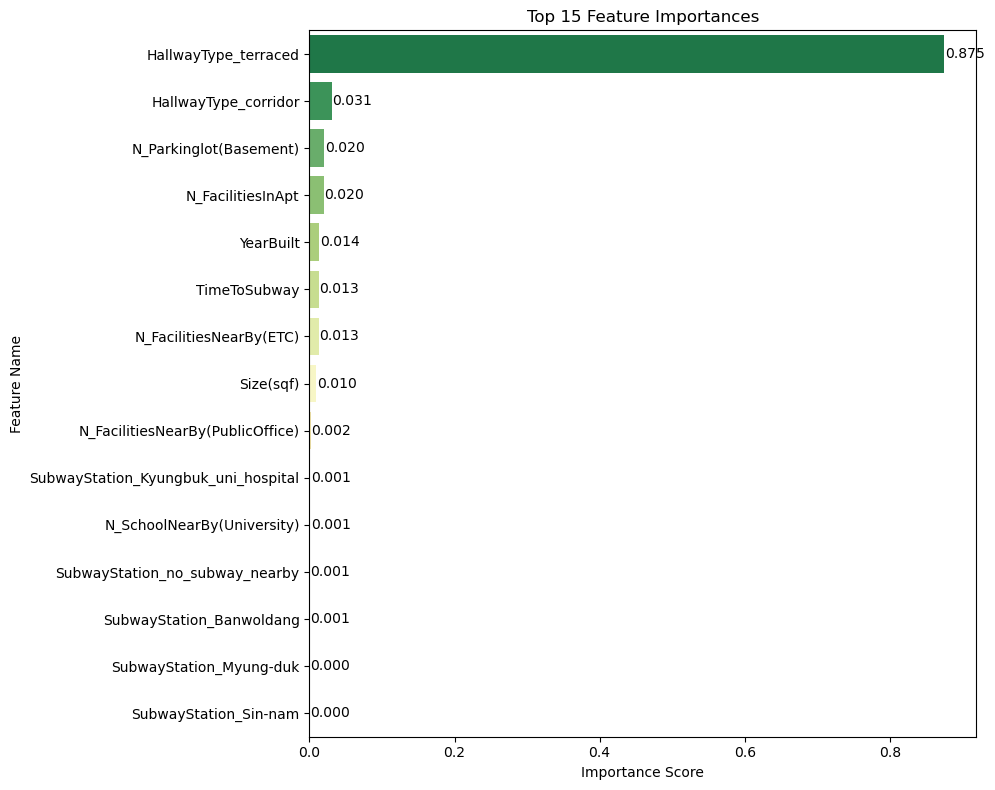

In [116]:
# Buat plot Top 15 feature importances dari best_xgb_model
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_feature_importances.head(15),
    palette='RdYlGn_r'
)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')

# Tambahkan label angka ke bar-nya
for i, (importance, name) in enumerate(zip(df_feature_importances['Importance'].head(15), df_feature_importances['Feature'].head(15))):
    plt.text(importance + 0.001, i, f'{importance:.3f}', va='center')

plt.tight_layout()
plt.show()


## Pentingnya Fitur dalam XGBoost

Berikut adalah beberapa fitur terpenting yang berpengaruh terhadap prediksi harga:

- Size(sqf): Fitur paling penting dalam prediksi, semakin luas apartemen, semakin tinggi harganya.
- YearBuilt: Tahun pembangunan berpengaruh karena apartemen baru biasanya lebih mahal.
- HallwayType: Tipe koridor seperti ‘terraced’ juga berpengaruh terhadap nilai jual.
- TimeToSubway: Semakin dekat ke stasiun subway, harga cenderung lebih tinggi.
- Jumlah Fasilitas & Parkiran: Semakin lengkap, semakin tinggi harganya.

Catatan: Pentingnya fitur ini bersifat spesifik terhadap model. Bukan berarti fitur tersebut menyebabkan harga naik, tetapi model menganggap fitur itu sangat berpengaruh terhadap prediksi.


# **5.Kesimpulan**

- Setelah melalui proses analisis dan tuning hyperparameter, model XGBoost terpilih sebagai model terbaik untuk memprediksi harga apartemen di kota Daegu.
- Model ini mampu menjelaskan lebih dari 80% variasi harga berdasarkan fitur yang tersedia dalam dataset.
- XGBoost unggul karena mampu menghindari overfitting dan memiliki performa stabil.
- Meskipun begitu, model ini tetap memiliki batasan seperti hanya berlaku untuk data Daegu, tidak bisa memprediksi kategori baru, dan tidak bisa memprediksi tren harga masa depan.

# **6.Rekomendasi**

- **Perluas Data**: Tambahkan fitur seperti fasilitas sekitar, indeks ekonomi, atau variabel lingkungan sosial.
- **Feature Engineering**: Buat fitur gabungan seperti rasio luas apartemen terhadap jumlah parkiran untuk menangkap nilai lebih dalam.
- **Refinement Model**: Eksplorasi model ensemble lain atau lakukan tuning lanjutan untuk meningkatkan akurasi.

## **Measurable Implementation:**

To measure the success of these recommendations, you could track metrics such as:

- **Model Performance**: Monitor the model's R^2, MAE, MAPE, and RMSE over time. The goal is to increase the R^2 and decrease the error metrics. If the model's performance decreases, it may be necessary to retrain the model with new data.
- **User Satisfaction**: Conduct surveys to gauge user satisfaction with the price predictions. The goal is to increase user satisfaction scores.
- **Data-Driven Development**: Property builders and developers can use model data to determine which features should be prioritized in development projects, based on current market preferences & also formulate marketing strategies targeting property features that significantly influence the sales price.
- **Business Impact**: Track the impact of the model on business outcomes, such as the number of properties sold and the average selling price. The goal is to increase the number of properties sold and the average selling price.

In [117]:
# Buat prediksi menggunakan model hasil manual tuning
y_pred = best_xgb_model.predict(X_test)

# Buat DataFrame perbandingan antara harga aktual dan prediksi
pred_vs_actual = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Simpan ke file CSV
pred_vs_actual.to_csv('Predicted_vs_Actual_Price.csv', index=False)

print("Hasil prediksi disimpan ke Predicted_vs_Actual_Price.csv")


Hasil prediksi disimpan ke Predicted_vs_Actual_Price.csv


In [118]:
import plotly.express as px
# Load data
df_result = pd.read_csv('/Users/fikrimaulana/Desktop/Predicted_vs_Actual_Price.csv')

# Plot interaktif
fig = px.scatter(
    df_result,
    x='Actual Price',
    y='Predicted Price',
    title='Interactive Scatter Plot: Predicted vs Actual SalePrice',
    labels={'Actual': 'Actual Price', 'Predicted': 'Predicted Price'},
    opacity=0.6,
    trendline='ols',
    template='plotly_white'
)

fig.update_layout(
    width=800,
    height=600,
    showlegend=False
)

fig.show()


Fitting 3 folds for each of 192 candidates, totalling 576 fits


/var/folders/jh/3gj_twjn05z7rk56ml5f771m0000gn/T/ipykernel_9700/2042734634.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




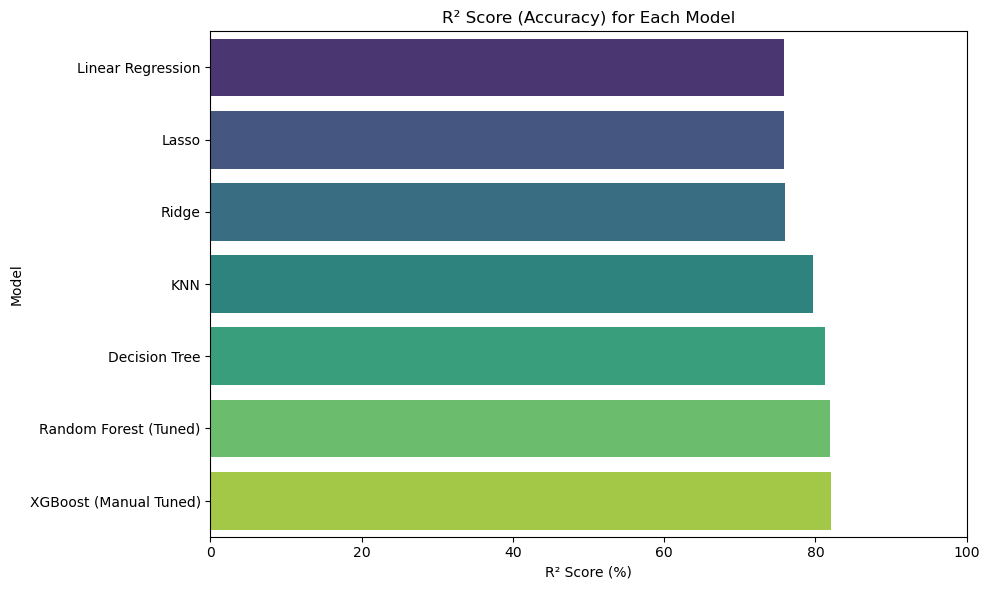

,Model,R2 Score (%),MAE,MAPE (%),RMSE
6,XGBoost (Manual Tuned),82.10,34883.22,19.22,1.830516e+09
5,Random Forest (Tuned),81.87,34995.34,19.36,1.853702e+09
4,Decision Tree,81.21,35164.10,19.43,1.921797e+09
3,KNN,79.62,36224.46,19.80,2.084431e+09
2,Ridge,75.92,40669.54,22.60,2.462788e+09
0,Linear Regression,75.91,40684.34,22.61,2.463926e+09
1,Lasso,75.91,40682.33,22.61,2.463738e+09


In [119]:
# Fungsi evaluasi model (tidak perlu diubah)
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    return {
        "Model": model_name,
        "R2 Score (%)": round(r2 * 100, 2),
        "MAE": round(mae, 2),
        "MAPE (%)": round(mape * 100, 2),
        "RMSE": round(rmse, 2)
    }

# Jalankan evaluasi untuk semua model
results = []
results.append(evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test, "Linear Regression"))
results.append(evaluate_model(Lasso(random_state=99), X_train, X_test, y_train, y_test, "Lasso"))
results.append(evaluate_model(Ridge(random_state=99), X_train, X_test, y_train, y_test, "Ridge"))
results.append(evaluate_model(KNeighborsRegressor(), X_train, X_test, y_train, y_test, "KNN"))
results.append(evaluate_model(DecisionTreeRegressor(random_state=99), X_train, X_test, y_train, y_test, "Decision Tree"))
results.append(evaluate_model(rf_grid, X_train, X_test, y_train, y_test, "Random Forest (Tuned)"))
results.append(evaluate_model(best_xgb_model, X_train, X_test, y_train, y_test, "XGBoost (Manual Tuned)"))

# Ubah ke DataFrame
df_results = pd.DataFrame(results)

# Plot visualisasi R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="R2 Score (%)", y="Model", palette="viridis")
plt.title("R² Score (Accuracy) for Each Model")
plt.xlabel("R² Score (%)")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# Juga tampilkan sebagai tabel (diurutkan dari skor tertinggi)
df_results.sort_values(by="R2 Score (%)", ascending=False)


In [123]:
import pickle

# Pastikan model sudah dilatih (fit)
# Contoh: best_xgb_model.fit(X_train, y_train)

# Simpan model ke file .sav
with open('xgb_model_ML.sav', 'wb') as file:
    pickle.dump(best_xgb_model, file)

print("Model berhasil disimpan ke xgb_model_ML.sav")


Model berhasil disimpan ke xgb_model_ML.sav


In [124]:
# Load model dari file
with open('xgb_model_ML.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# Gunakan model untuk prediksi
y_pred = loaded_model.predict(X_test)